## 📌 Project Title
Academic Performance & Risk Prediction System

## 🎯 Problem Statement
Educational institutions often identify struggling students too late.
This project aims to predict students’ final academic scores and identify
at-risk students early using academic history, attendance, and lifestyle
factors.

## 🧠 Objectives
1. Predict the final academic score of a student (Regression).
2. Classify whether a student is academically at risk (Classification).
3. Analyze key factors influencing student performance.

## 📊 Dataset Description
The dataset contains student study habits, lifestyle indicators, attendance,
and previous academic performance. Missing values are intentionally included
to simulate real-world data conditions.


In [67]:
import pandas as pd
import numpy as np

data = {
    "Study_Hours": [
        1,2,3,4,5,6,7,8,9,10,
        4,6,8,2,9,5,7,3,6,8,
        4, np.nan, 7, 5, 6, 8, 9, np.nan, 3, 2
    ],
    
    "Sleep_Hours": [
        4,5,6,6,7,7,8,8,9,9,
        6,7,8,5,9,6,8,6,7,8,
        6,7,np.nan,6,7,8,9,5,6,7
    ],
    
    "Mobile_Usage": [
        7,6,6,5,4,4,3,3,2,2,
        5,4,3,6,2,4,3,5,4,3,
        np.nan,4,3,5,4,3,2,6,5,6
    ],
    
    "Attendance": [
        40,50,55,60,65,70,75,80,85,90,
        68,78,88,52,92,72,82,58,76,86,
        66,74,84,np.nan,78,88,90,55,60,65
    ],
    
    "Previous_Score": [
        20,25,30,40,50,55,65,70,80,85,
        45,60,75,28,88,58,72,35,65,78,
        48,62,70,52,np.nan,80,85,32,38,42
    ],
    
    "Final_Score": [
        22,30,35,45,55,60,70,75,85,90,
        50,65,80,32,90,62,78,42,68,82,
        52,66,75,58,60,85,88,40,45,48
    ]
}

df = pd.DataFrame(data)
print(df.head())
print(df.isnull().sum())


   Study_Hours  Sleep_Hours  Mobile_Usage  Attendance  Previous_Score  \
0          1.0          4.0           7.0        40.0            20.0   
1          2.0          5.0           6.0        50.0            25.0   
2          3.0          6.0           6.0        55.0            30.0   
3          4.0          6.0           5.0        60.0            40.0   
4          5.0          7.0           4.0        65.0            50.0   

   Final_Score  
0           22  
1           30  
2           35  
3           45  
4           55  
Study_Hours       2
Sleep_Hours       1
Mobile_Usage      1
Attendance        1
Previous_Score    1
Final_Score       0
dtype: int64


In [68]:
# now we will be doing the EDA(Exploratory data analysis) with the help of pandas and other library
df.describe()

,Study_Hours,Sleep_Hours,Mobile_Usage,Attendance,Previous_Score,Final_Score
count,28.000000,29.000000,29.000000,29.000000,29.000000,30.000000
mean,5.607143,6.896552,4.103448,71.793103,56.310345,61.100000
std,2.528933,1.345491,1.422895,13.960094,20.101712,19.430424
min,1.000000,4.000000,2.000000,40.000000,20.000000,22.000000
25%,3.750000,6.000000,3.000000,60.000000,40.000000,45.750000
50%,6.000000,7.000000,4.000000,74.000000,58.000000,61.000000
75%,8.000000,8.000000,5.000000,84.000000,72.000000,77.250000
max,10.000000,9.000000,7.000000,92.000000,88.000000,90.000000


In [69]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Study_Hours     28 non-null     float64
 1   Sleep_Hours     29 non-null     float64
 2   Mobile_Usage    29 non-null     float64
 3   Attendance      29 non-null     float64
 4   Previous_Score  29 non-null     float64
 5   Final_Score     30 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.5 KB


In [70]:
print(df.isnull().sum())

Study_Hours       2
Sleep_Hours       1
Mobile_Usage      1
Attendance        1
Previous_Score    1
Final_Score       0
dtype: int64


In [71]:
# as we can see there are some null value in this data so we have two option ether drop it or normalize it 
# we are going to pick the second option
df["Study_Hours"]  = df["Study_Hours"].fillna(df["Study_Hours"].mean())
df["Sleep_Hours"]  = df["Sleep_Hours"].fillna(df["Sleep_Hours"].mean())
df["Mobile_Usage"]  = df["Mobile_Usage"].fillna(df["Mobile_Usage"].mean())
df["Attendance"]  = df["Attendance"].fillna(df["Attendance"].mean())
df["Previous_Score"]  = df["Previous_Score"].fillna(df["Previous_Score"].mean())


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Study_Hours     30 non-null     float64
 1   Sleep_Hours     30 non-null     float64
 2   Mobile_Usage    30 non-null     float64
 3   Attendance      30 non-null     float64
 4   Previous_Score  30 non-null     float64
 5   Final_Score     30 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.5 KB


In [73]:
#now we will be adding a new column which will be of the st risk
df["At_risk"] = df["Final_Score"].apply(
    lambda x : 1 if x<50 else 0
)

In [74]:
df.head(5)

,Study_Hours,Sleep_Hours,Mobile_Usage,Attendance,Previous_Score,Final_Score,At_risk
0,1.0,4.0,7.0,40.0,20.0,22,1
1,2.0,5.0,6.0,50.0,25.0,30,1
2,3.0,6.0,6.0,55.0,30.0,35,1
3,4.0,6.0,5.0,60.0,40.0,45,1
4,5.0,7.0,4.0,65.0,50.0,55,0


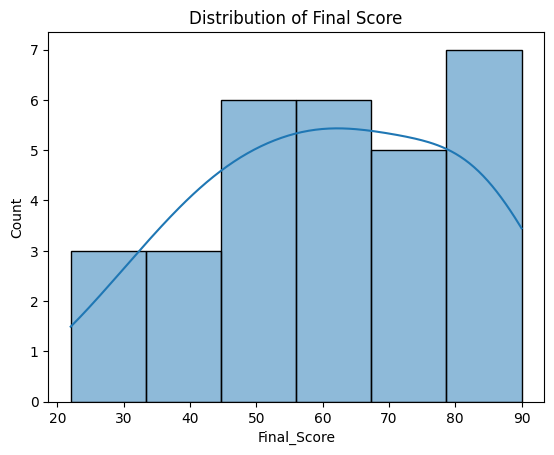

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Final_Score"], kde=True)
plt.title("Distribution of Final Score")
plt.show()



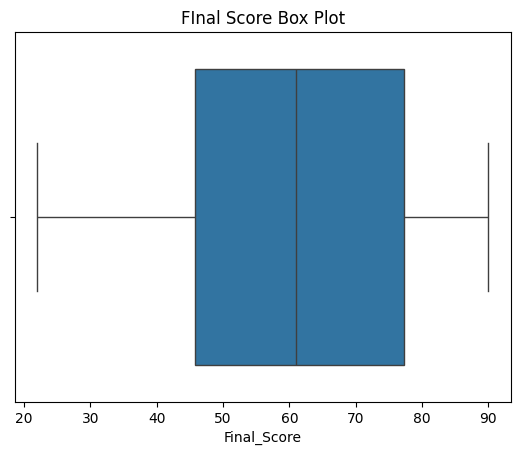

In [76]:
sns.boxplot(x = df["Final_Score"])
plt.title("FInal Score Box Plot")
plt.show()

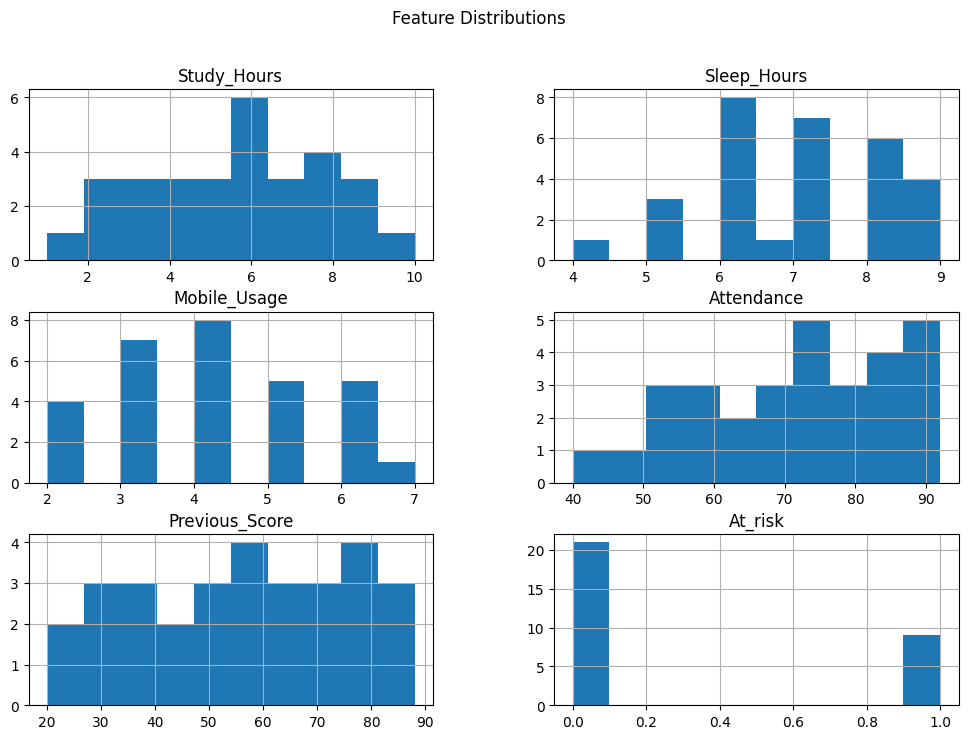

In [77]:
# as we can see we haven't found any outlier yet in then we can move forward
df.drop(["Final_Score", "At_Risk"], axis=1, errors="ignore").hist(
    figsize=(12,8)
)
plt.suptitle("Feature Distributions")
plt.show()


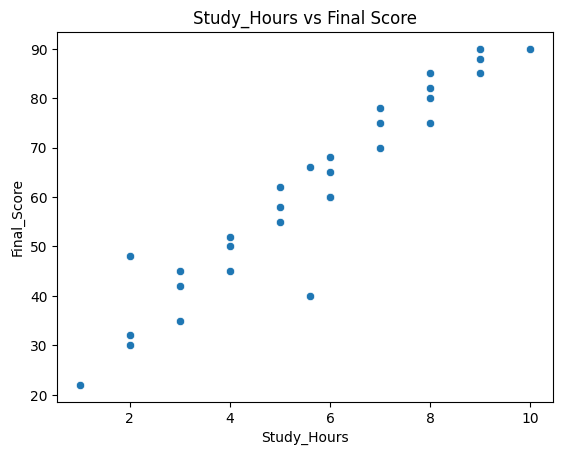

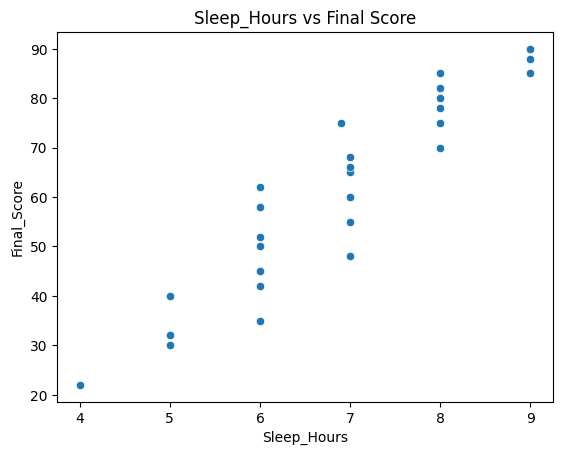

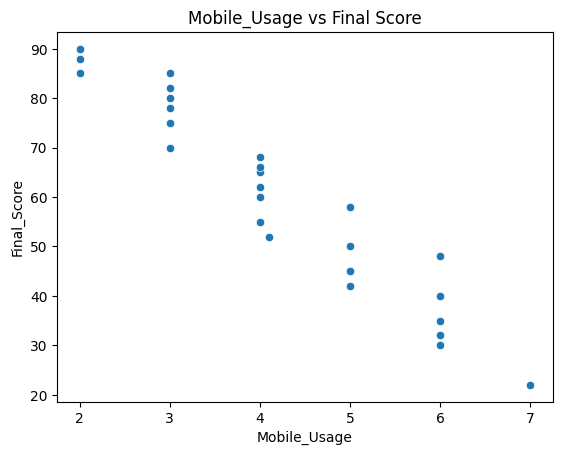

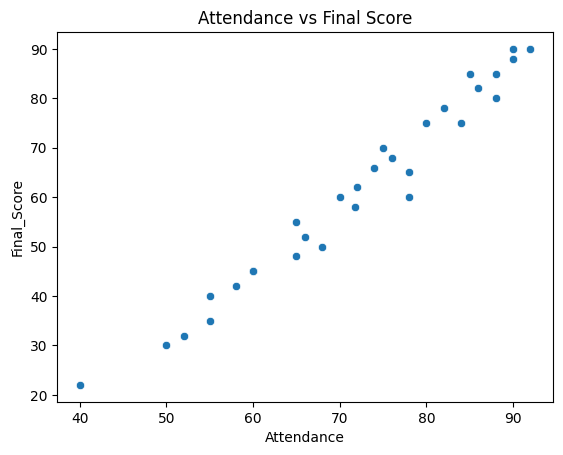

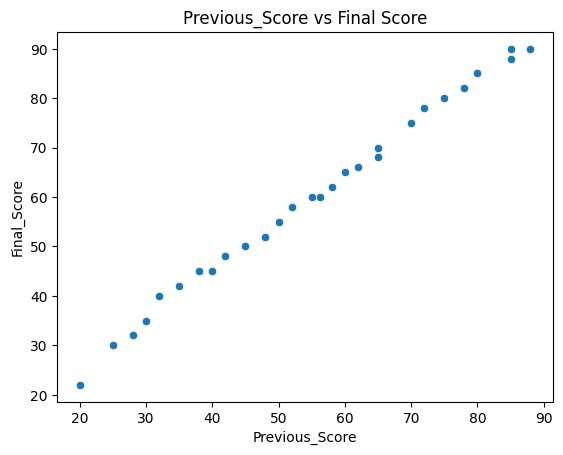

In [78]:
# as we can see that all features contribute equally in the prediction
features = ["Study_Hours", "Sleep_Hours", "Mobile_Usage", "Attendance", "Previous_Score"]

for feature in features:
    sns.scatterplot(x=df[feature], y=df["Final_Score"])
    plt.title(f"{feature} vs Final Score")
    plt.show()


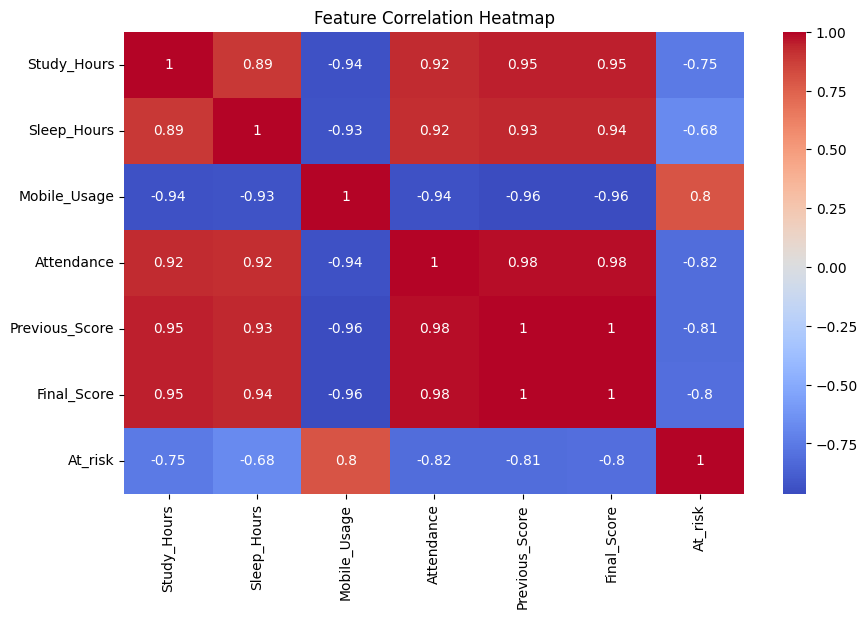

In [79]:
# as we can see that only the mobile usage have a negative co-relation with the final score  and hence also with the at risk section and others are having a postive realtion
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


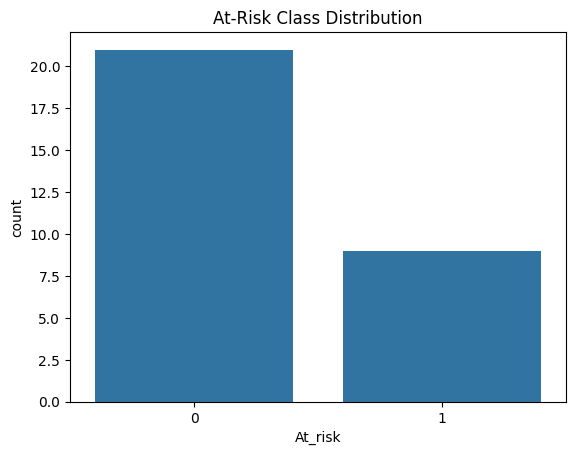

In [80]:
sns.countplot(x=df["At_risk"])
plt.title("At-Risk Class Distribution")
plt.show()


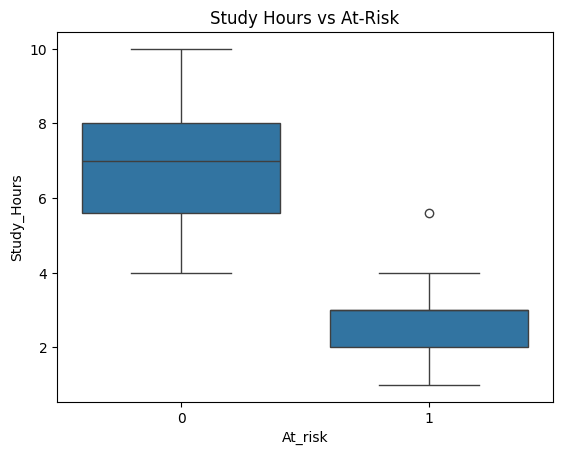

In [81]:
sns.boxplot(x="At_risk", y="Study_Hours", data=df)
plt.title("Study Hours vs At-Risk")
plt.show()


In [82]:
# as we can see that there is only one outlier which wont make much effect on our model

In [83]:
# now we will be making two ml model one with logistic regression and one with the linear regression adn we will also do the scaling
# and we will also be doing the accuracy check with R2 and other parameter
# 1. Define your features (X) by dropping the target columns
X = df.drop(columns=['Final_Score', 'At_risk'])

# 2. Define your target (y) by selecting those columns with double brackets
y_score= df['Final_Score']
y_risk = df['At_risk']


In [84]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(X)

In [85]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(
    x_scaled,
    y_score,
    test_size=0.2,
    random_state=42
)

x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(
    x_scaled,
    y_risk,
    test_size=0.2,
    random_state=42
)


In [86]:
# first model will be of linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train) 
    


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [87]:
# second model with the logistic regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train1,y_train1)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [88]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# --- Linear Regression Model Evaluation for Final_Score ---
y_pred_score = model.predict(x_test)

print("Linear Regression - Final_Score Prediction")
print("Actual values:", y_test.values)
print("Predicted values:", y_pred_score)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred_score)
mse = mean_squared_error(y_test, y_pred_score)
r2 = r2_score(y_test, y_pred_score)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# --- Logistic Regression Model Evaluation for At_risk ---
y_pred_risk = model1.predict(x_test1)

print("\nLogistic Regression - At_risk Prediction")
print("Actual values:", y_test1.values)
print("Predicted values:", y_pred_risk)

# Evaluation metrics
accuracy = accuracy_score(y_test1, y_pred_risk)
conf_matrix = confusion_matrix(y_test1, y_pred_risk)
class_report = classification_report(y_test1, y_pred_risk)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Linear Regression - Final_Score Prediction
Actual values: [40 62 58 42 85 90]
Predicted values: [34.96799822 61.67904788 55.96076681 40.67285664 84.46980762 88.97630188]
Mean Absolute Error (MAE): 1.71
Mean Squared Error (MSE): 5.45
R^2 Score: 0.99

Logistic Regression - At_risk Prediction
Actual values: [1 0 0 1 0 0]
Predicted values: [1 0 0 1 0 0]
Accuracy: 1.00
Confusion Matrix:
 [[4 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

